In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.patches as patches

In [2]:
#dataset baci
fileNameBaci ="C:/Users/Michele/Desktop/UNIBO/2° ANNO/SNA/progetto/BACI_HS17_V202301/BACI_HS17_Y2017_V202301.csv"
baci_data = pd.read_csv(fileNameBaci)
baci_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918490 entries, 0 to 9918489
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   t       int64  
 1   i       int64  
 2   j       int64  
 3   k       int64  
 4   v       float64
 5   q       object 
dtypes: float64(1), int64(4), object(1)
memory usage: 454.0+ MB


In [4]:
#dataset info paese
fileName = "C:/Users/Michele/Desktop/UNIBO/2° ANNO/SNA/progetto/BACI_HS17_V202301/country_code_coordinates_region_merged.csv"
countryCoor= pd.read_csv(fileName,sep=";")
# Converti le colonne 'Longitude' e 'Latitude' in float
#countryCoor['Longitude'] = countryCoor['Longitude'].astype(float)
#countryCoor['Latitude'] = countryCoor['Latitude'].astype(float)
countryCoor.info()
print(countryCoor)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country_code               238 non-null    int64  
 1   country_name_abbreviation  238 non-null    object 
 2   country_name_full          238 non-null    object 
 3   iso_2digit_alpha           237 non-null    object 
 4   iso_3digit_alpha           238 non-null    object 
 5   Latitude                   238 non-null    float64
 6   Longitude                  238 non-null    float64
 7   region                     235 non-null    object 
 8   sub-region                 234 non-null    object 
 9   region-code                235 non-null    float64
 10  sub-region-code            235 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 20.6+ KB
     country_code country_name_abbreviation          country_name_full  \
0               4             

In [130]:
#lista dei paesi
pd.set_option('display.max_rows', 10)
#concateno esportatori e importatori e prendo solo i valori distinti per avere un elenco dei paesi coinvolti
dfpaesiArr=pd.concat([baci_data['i'],baci_data['j']]).unique()
dfpaesi = pd.Series(dfpaesiArr, name='country_code')
print(dfpaesi)
dfpaesi.info()

#associo lat e len
colonna_comune = 'country_code'
#creo un dataFrame con tutti i paesi coinvolti più lat,leng,regione e colore
dfPaeseCoord = pd.merge(dfpaesi, countryCoor, on=colonna_comune, how='inner')
#aggiungo la colonna colore
dfPaeseCoord['colore'] = ["yellow" if r == 142 else
                                "green" if r == 150 else
                                "red" if r == 2 else
                                "lightpink" if r == 9 else
                                "skyblue" if r == 19 else
                                "default_color"
                                for r in dfPaeseCoord['region-code']]
print(dfPaeseCoord)
dfPaeseCoord.info()
export = dfPaeseCoord[["country_code","iso_2digit_alpha"]]
export.to_csv("C:/Users/Michele/Desktop/UNIBO/2° ANNO/Fisica/paesi.csv", index=False)
duplicati = dfPaeseCoord[dfPaeseCoord.duplicated(["iso_3digit_alpha"], keep=False)]


0        4
1        8
2       12
3       16
4       20
      ... 
221    862
222    876
223    882
224    887
225    894
Name: country_code, Length: 226, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 226 entries, 0 to 225
Series name: country_code
Non-Null Count  Dtype
--------------  -----
226 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB
     country_code country_name_abbreviation          country_name_full  \
0               4               Afghanistan                Afghanistan   
1               8                   Albania                    Albania   
2              12                   Algeria                    Algeria   
3              16            American Samoa             American Samoa   
4              20                   Andorra                    Andorra   
..            ...                       ...                        ...   
221           862                 Venezuela                  Venezuela   
222           876    Wallis and Futuna Is

In [94]:
#due principali flussi di esportazione per ogni Paese

# Raggruppa per esportatore e importatore e somma i valori commerciali
grouped_df = baci_data.groupby(['i', 'j'])['v'].sum().reset_index()
#Sprint(grouped_df)
grouped_df.info()
# Ordina in base ai valori commerciali in ordine decrescente
sorted_df = grouped_df.sort_values(by='v', ascending=False)
#print(sorted_df)

# Seleziona i primi due partner commerciali per ciascun paese
df_top2_partners = sorted_df.groupby('i').head(2)

# Visualizza l'elenco dei primi due partner commerciali per ciascun paese
pd.set_option('display.max_rows', 10)

df_top2_partners=df_top2_partners.reset_index()
print(df_top2_partners)
#df_top2_partners.info()
df_top2_partners.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26194 entries, 0 to 26193
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       26194 non-null  int64  
 1   j       26194 non-null  int64  
 2   v       26194 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 614.1 KB
     index    i    j             v
0     5001  156  842  4.690556e+08
1    15288  484  842  3.047362e+08
2     4144  124  842  2.926599e+08
3     4880  156  344  2.640834e+08
4    25277  842  124  2.529965e+08
..     ...  ...  ...           ...
447  17671  574  842  2.529410e+02
448  18888  612  251  2.294090e+02
449  25957  876  826  2.094830e+02
450   5112  166  826  1.971090e+02
451  25939  876  251  1.562180e+02

[452 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   452 non-null    int6

In [72]:
#creo il df per aggiungere anche il country code
dfPaesiCCode=pd.DataFrame(dfpaesi, columns=["country_code"])

# Conta il numero di archi in entrata per ogni paese
inbound_counts = baci_data['j'].value_counts()

# Crea un DataFrame finale
df_risultato = pd.DataFrame({'country_code': dfPaesiCCode['country_code'],
                             'inbound_count': dfPaesiCCode['country_code'].map(inbound_counts).fillna(0)})
# Stampa il DataFrame risultante
print(df_risultato)

#associo lat e len
colonna_comune = 'country_code'
#creo un dataFrame con tutti i paesi coinvolti più l'attributo inbound_count
dfPaeseCoord = pd.merge(dfPaeseCoord, df_risultato, on=colonna_comune, how='left')
print(dfPaeseCoord)
dfPaeseCoord.info()

     country_code  inbound_count
0               4          13219
1               8          28443
2              12          57924
3              16           1663
4              20          18050
..            ...            ...
221           862          21170
222           876           1676
223           882           5675
224           887          10204
225           894          34903

[226 rows x 2 columns]
     country_code country_name_abbreviation          country_name_full  \
0               4               Afghanistan                Afghanistan   
1               8                   Albania                    Albania   
2              12                   Algeria                    Algeria   
3              16            American Samoa             American Samoa   
4              20                   Andorra                    Andorra   
..            ...                       ...                        ...   
221           862                 Venezuela                  V

226
452


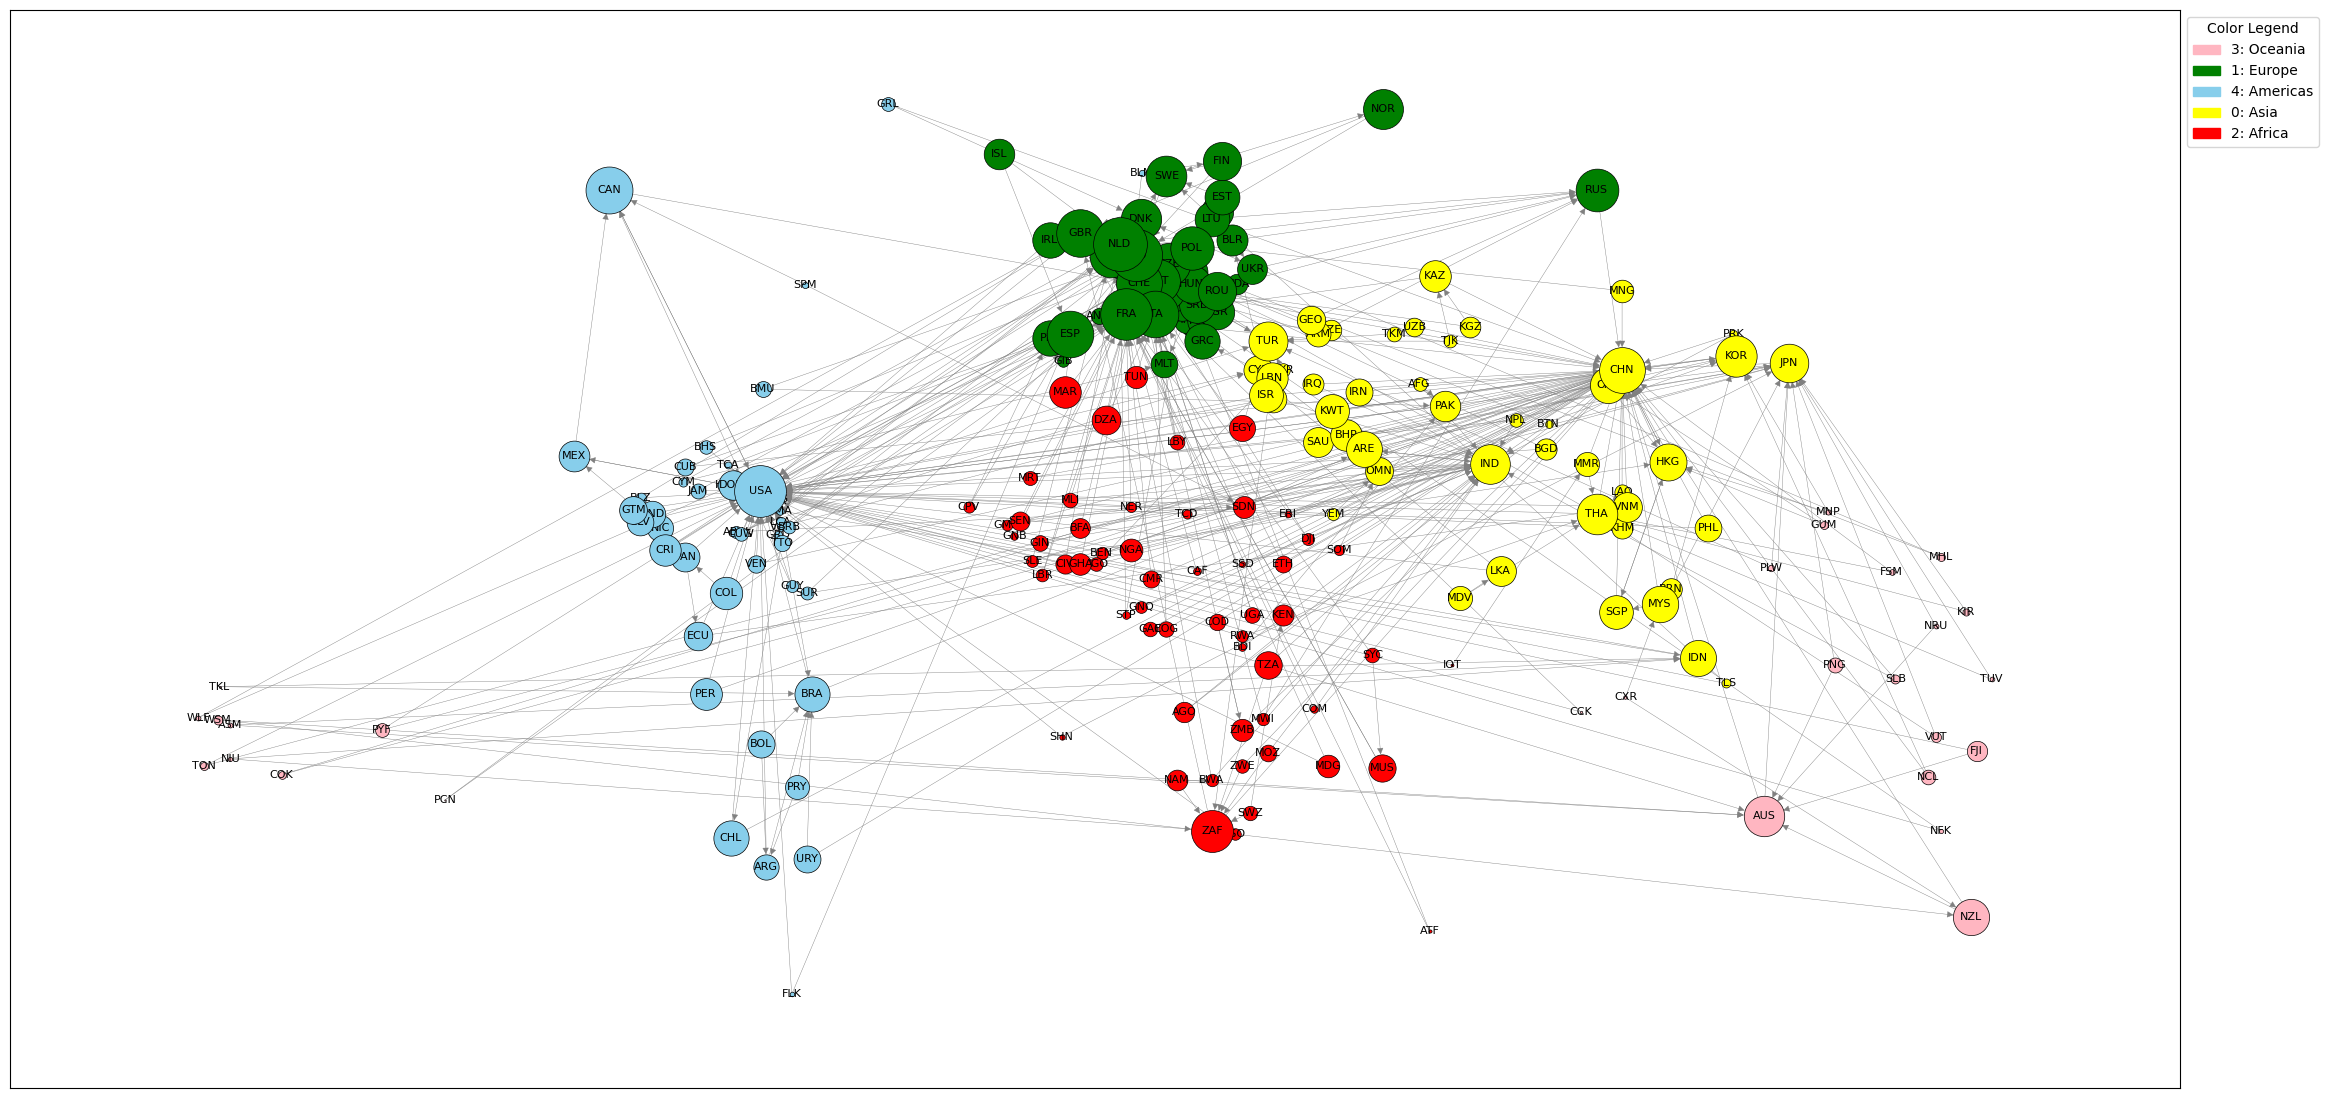

In [125]:
#stampa mappa con i nodi che sono i 226 paesi e gli archi che corrispondono ai primi due partner commerciali per ogni paese
G = nx.DiGraph()

# Filtra i dati per assicurarti che le colonne di posizione contengano solo valori numerici validi
dfPaeseCoord = dfPaeseCoord[dfPaeseCoord['Longitude'].notna() & dfPaeseCoord['Latitude'].notna()]


# Aggiungi nodi al grafo

for index, row in dfPaeseCoord.iterrows():
    G.add_node(row['iso_3digit_alpha'], 
               pos=(row['Longitude'], row['Latitude']), 
               country_code=row['country_code'],
               size=row['inbound_count'],
               color=row['colore'],
               index=index)

print(G.number_of_nodes())

for i, r in df_top2_partners.iterrows():
    node_i_country_code = r['i']
    node_j_country_code = r['j']
    
    # Cerca i nodi corrispondenti ai country cod
    node_i = next((node for node, data in G.nodes(data=True) if data['country_code'] == node_i_country_code), None)
    node_j = next((node for node, data in G.nodes(data=True) if data['country_code'] == node_j_country_code), None)

    
    
    # Verifica che i nodi siano presenti nel grafo prima di aggiungere l'arco
    if node_i is not None and node_j is not None:
        # Aggiungi l'arco al grafo utilizzando i nodi trovati
        G.add_edge(node_i, node_j)
    
print(G.number_of_edges())
fig, ax = plt.subplots(figsize=(28, 14))

pos = nx.get_node_attributes(G, 'pos')

# Aumenta il fattore di normalizzazione per rendere le dimensioni più grandi
normalization_factor = 1500
# Trova la dimensione massima tra tutti i nodi
max_size = max(G.nodes[node]['size'] for node in G.nodes)
# Normalizza le dimensioni dei nodi in base alle dimensioni dell'area di plotting
node_sizes_normalized = [G.nodes[node]['size'] / max_size * normalization_factor for node in G.nodes]

# Creare una legenda personalizzata
unique_colors = list(set(data['color'] for node, data in G.nodes(data=True)))
color_map = {
    'yellow': {'index': 0, 'label': 'Asia'},
    'green': {'index': 1, 'label': 'Europe'},
    'red': {'index': 2, 'label': 'Africa'},
    'lightpink': {'index': 3, 'label': 'Oceania'},
    'skyblue': {'index': 4, 'label': 'Americas'},
    # Aggiungi altri colori se necessario
}

# Creare una legenda personalizzata
legend_elements = [patches.Patch(color=color, label=f"{color_map[color]['index']}: {color_map[color]['label']}") for color in unique_colors]

# Disegna i nodi personalizzati
for node, (x, y) in pos.items():
    size = node_sizes_normalized[G.nodes[node]['index']]
    color = G.nodes[node]['color']
    
    # Disegna il nodo con zorder basato sulla dimensione
    ax.scatter(x, y, s=size, c=color, edgecolors='black', linewidths=0.5, zorder=size)

# Aggiungi l'etichetta del nodo dopo aver disegnato i nodi
for node, (x, y) in pos.items():
    size = node_sizes_normalized[G.nodes[node]['index']]
    
    # Aggiungi l'etichetta del nodo
    ax.annotate(node, (x, y), textcoords="offset points", xytext=(0, 0), ha='center', va='center', fontsize=8, zorder=size + 1)

# Aggiungere la legenda al grafico
ax.legend(handles=legend_elements, title='Color Legend', bbox_to_anchor=(1, 1), loc='upper left')

# Disegna gli archi
edges = nx.draw_networkx_edges(G, pos, ax=ax, width=0.3, node_size=node_sizes_normalized, edge_color='grey', arrows=True, arrowstyle="-|>")
plt.savefig("C:/Users/Michele/Desktop/UNIBO/2° ANNO/SNA/progetto/prova.jpg", dpi=300)
plt.show()



226
452


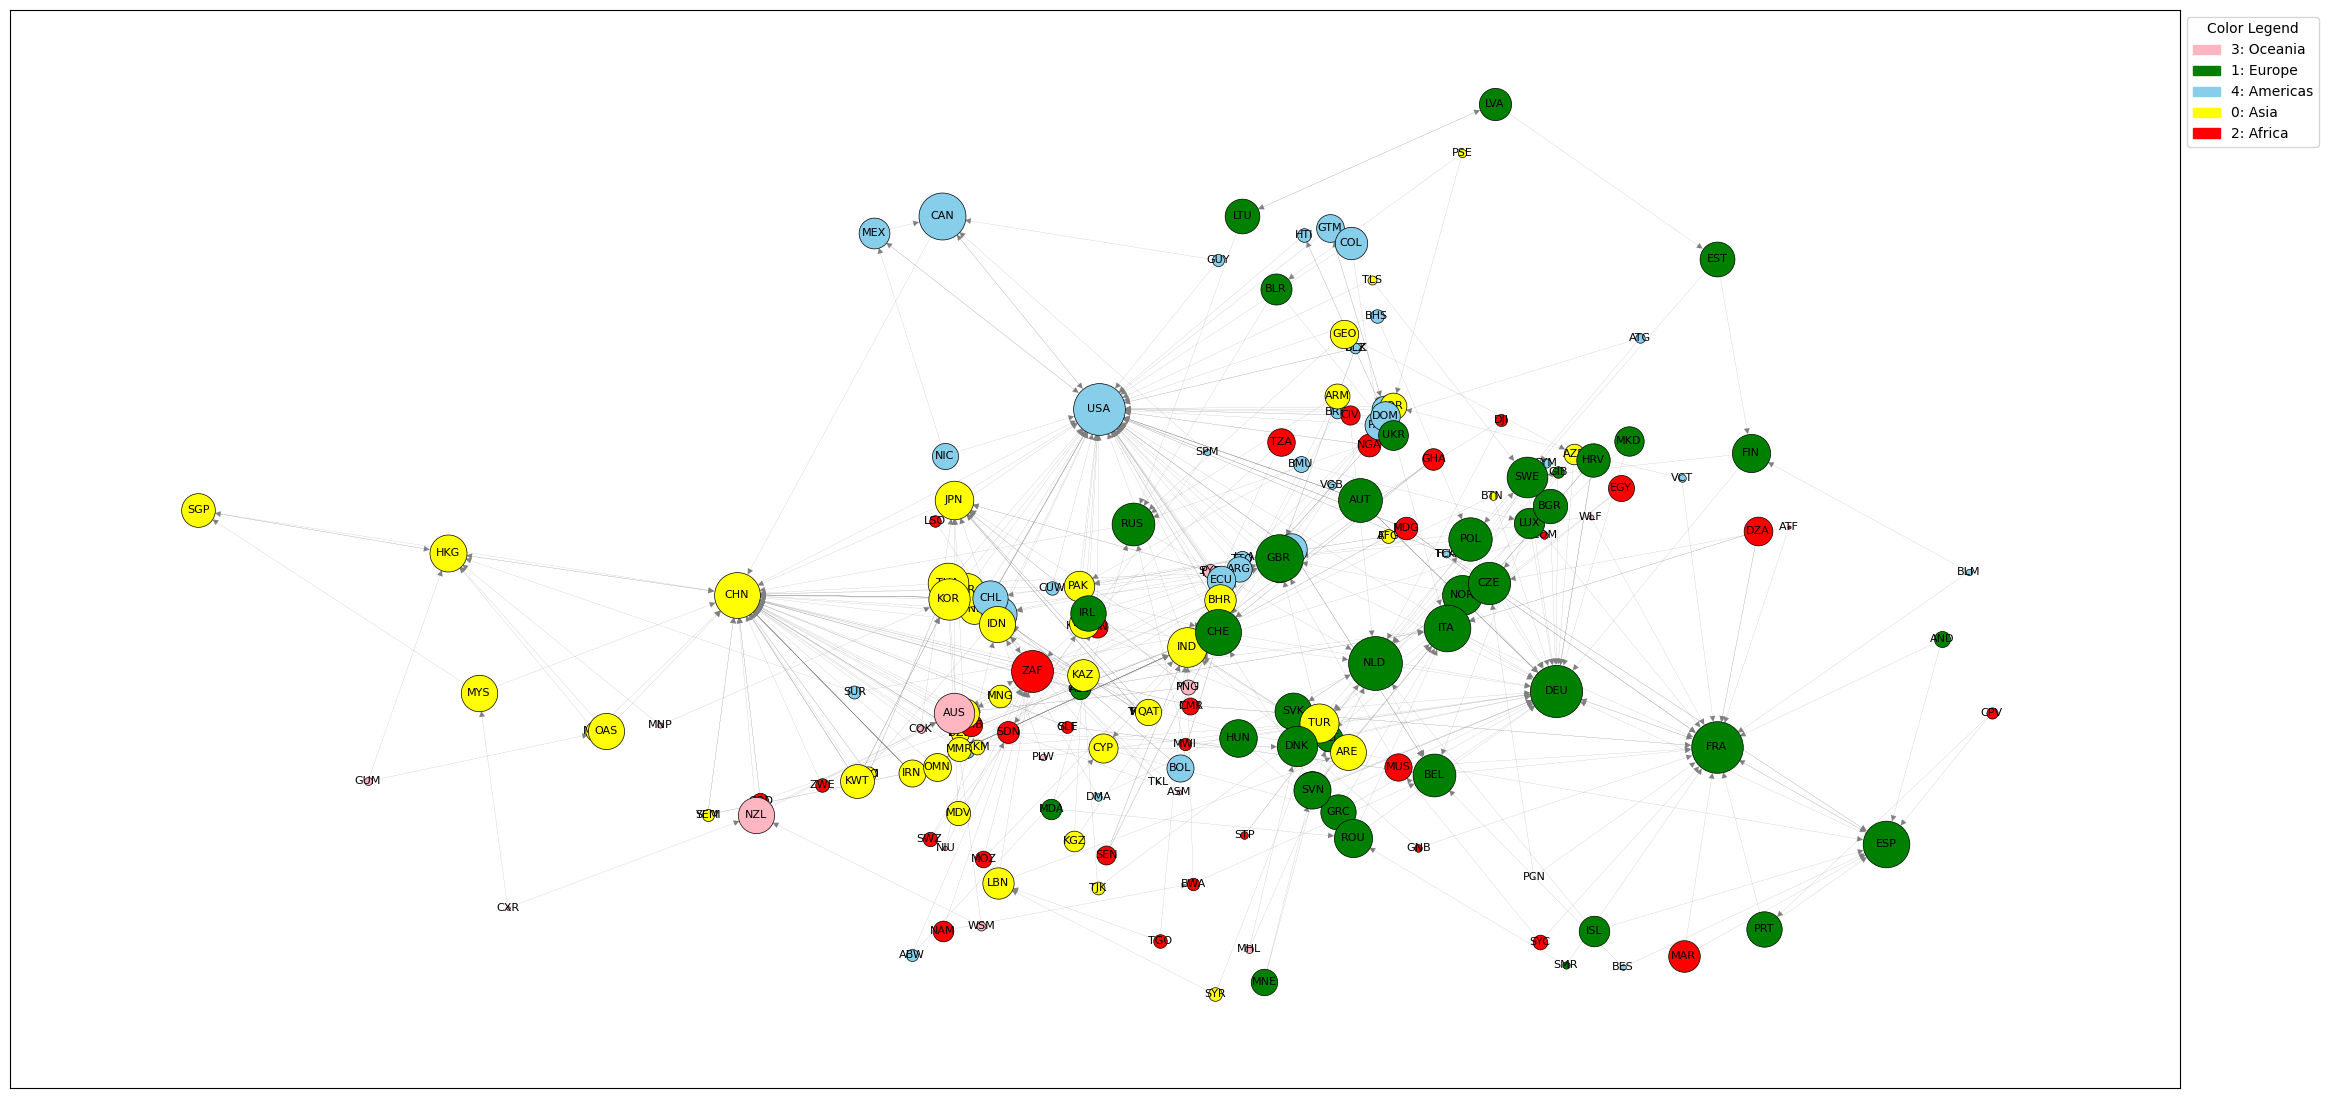

In [127]:
#stampa mappa. stessa mappa di prima ma con le posizioni derivanti dall'algoritmo kamada_kawai
G1 = nx.DiGraph()

# Filtra i dati per assicurarti che le colonne di posizione contengano solo valori numerici validi
dfPaeseCoord = dfPaeseCoord[dfPaeseCoord['Longitude'].notna() & dfPaeseCoord['Latitude'].notna()]

# Aggiungi nodi al grafo

for index, row in dfPaeseCoord.iterrows():
    G1.add_node(row['iso_3digit_alpha'], 
               pos=(row['Longitude'], row['Latitude']), 
               country_code=row['country_code'],
               size=row['inbound_count'],
               color=row['colore'],
               index=index)

print(G1.number_of_nodes())

for i, r in df_top2_partners.iterrows():
    node_i_country_code = r['i']
    node_j_country_code = r['j']
    
    # Cerca i nodi corrispondenti ai country cod
    node_i = next((node for node, data in G1.nodes(data=True) if data['country_code'] == node_i_country_code), None)
    node_j = next((node for node, data in G1.nodes(data=True) if data['country_code'] == node_j_country_code), None)

    # Verifica che i nodi siano presenti nel grafo prima di aggiungere l'arco
    if node_i is not None and node_j is not None:
        # Aggiungi l'arco al grafo utilizzando i nodi trovati
        G1.add_edge(node_i, node_j)
  
print(G1.number_of_edges())
fig, ax = plt.subplots(figsize=(28, 14))

# Posiziona i nodi utilizzando l'algoritmo kamada_kawai
pos = nx.kamada_kawai_layout(G1)

# Aumenta il fattore di normalizzazione per rendere le dimensioni più grandi
normalization_factor = 1500
# Trova la dimensione massima tra tutti i nodi
max_size = max(G1.nodes[node]['size'] for node in G1.nodes)
# Normalizza le dimensioni dei nodi in base alle dimensioni dell'area di plotting
node_sizes_normalized = [G1.nodes[node]['size'] / max_size * normalization_factor for node in G1.nodes]

#leggenda colori
# Creare una mappa di colori unica per ogni colore presente nei nodi
unique_colors = list(set(data['color'] for node, data in G1.nodes(data=True)))
color_map = {
    'yellow': {'index': 0, 'label': 'Asia'},
    'green': {'index': 1, 'label': 'Europe'},
    'red': {'index': 2, 'label': 'Africa'},
    'lightpink': {'index': 3, 'label': 'Oceania'},
    'skyblue': {'index': 4, 'label': 'Americas'},
    # Aggiungi altri colori se necessario
}

# Creare una legenda personalizzata
legend_elements = [patches.Patch(color=color, label=f"{color_map[color]['index']}: {color_map[color]['label']}") for color in unique_colors]

# Aggiungere la legenda al grafico
ax.legend(handles=legend_elements, title='Color Legend', bbox_to_anchor=(1, 1), loc='upper left')

# Disegna i nodi personalizzati
for node, (x, y) in pos.items():
    size = node_sizes_normalized[G.nodes[node]['index']]
    color = G.nodes[node]['color']
    
    # Disegna il nodo con zorder basato sulla dimensione
    ax.scatter(x, y, s=size, c=color, edgecolors='black', linewidths=0.5, zorder=size)

# Aggiungi l'etichetta del nodo dopo aver disegnato i nodi
for node, (x, y) in pos.items():
    size = node_sizes_normalized[G.nodes[node]['index']]
    
    # Aggiungi l'etichetta del nodo
    ax.annotate(node, (x, y), textcoords="offset points", xytext=(0, 0), ha='center', va='center', fontsize=8, zorder=size + 1)



# Disegna gli archi
edges = nx.draw_networkx_edges(G1, pos, ax=ax, width=0.1,node_size=node_sizes_normalized, edge_color='grey', arrows=True, arrowstyle="-|>")

plt.savefig("C:/Users/Michele/Desktop/UNIBO/2° ANNO/SNA/progetto/figura3.jpg", dpi=300)
plt.show()


15
22


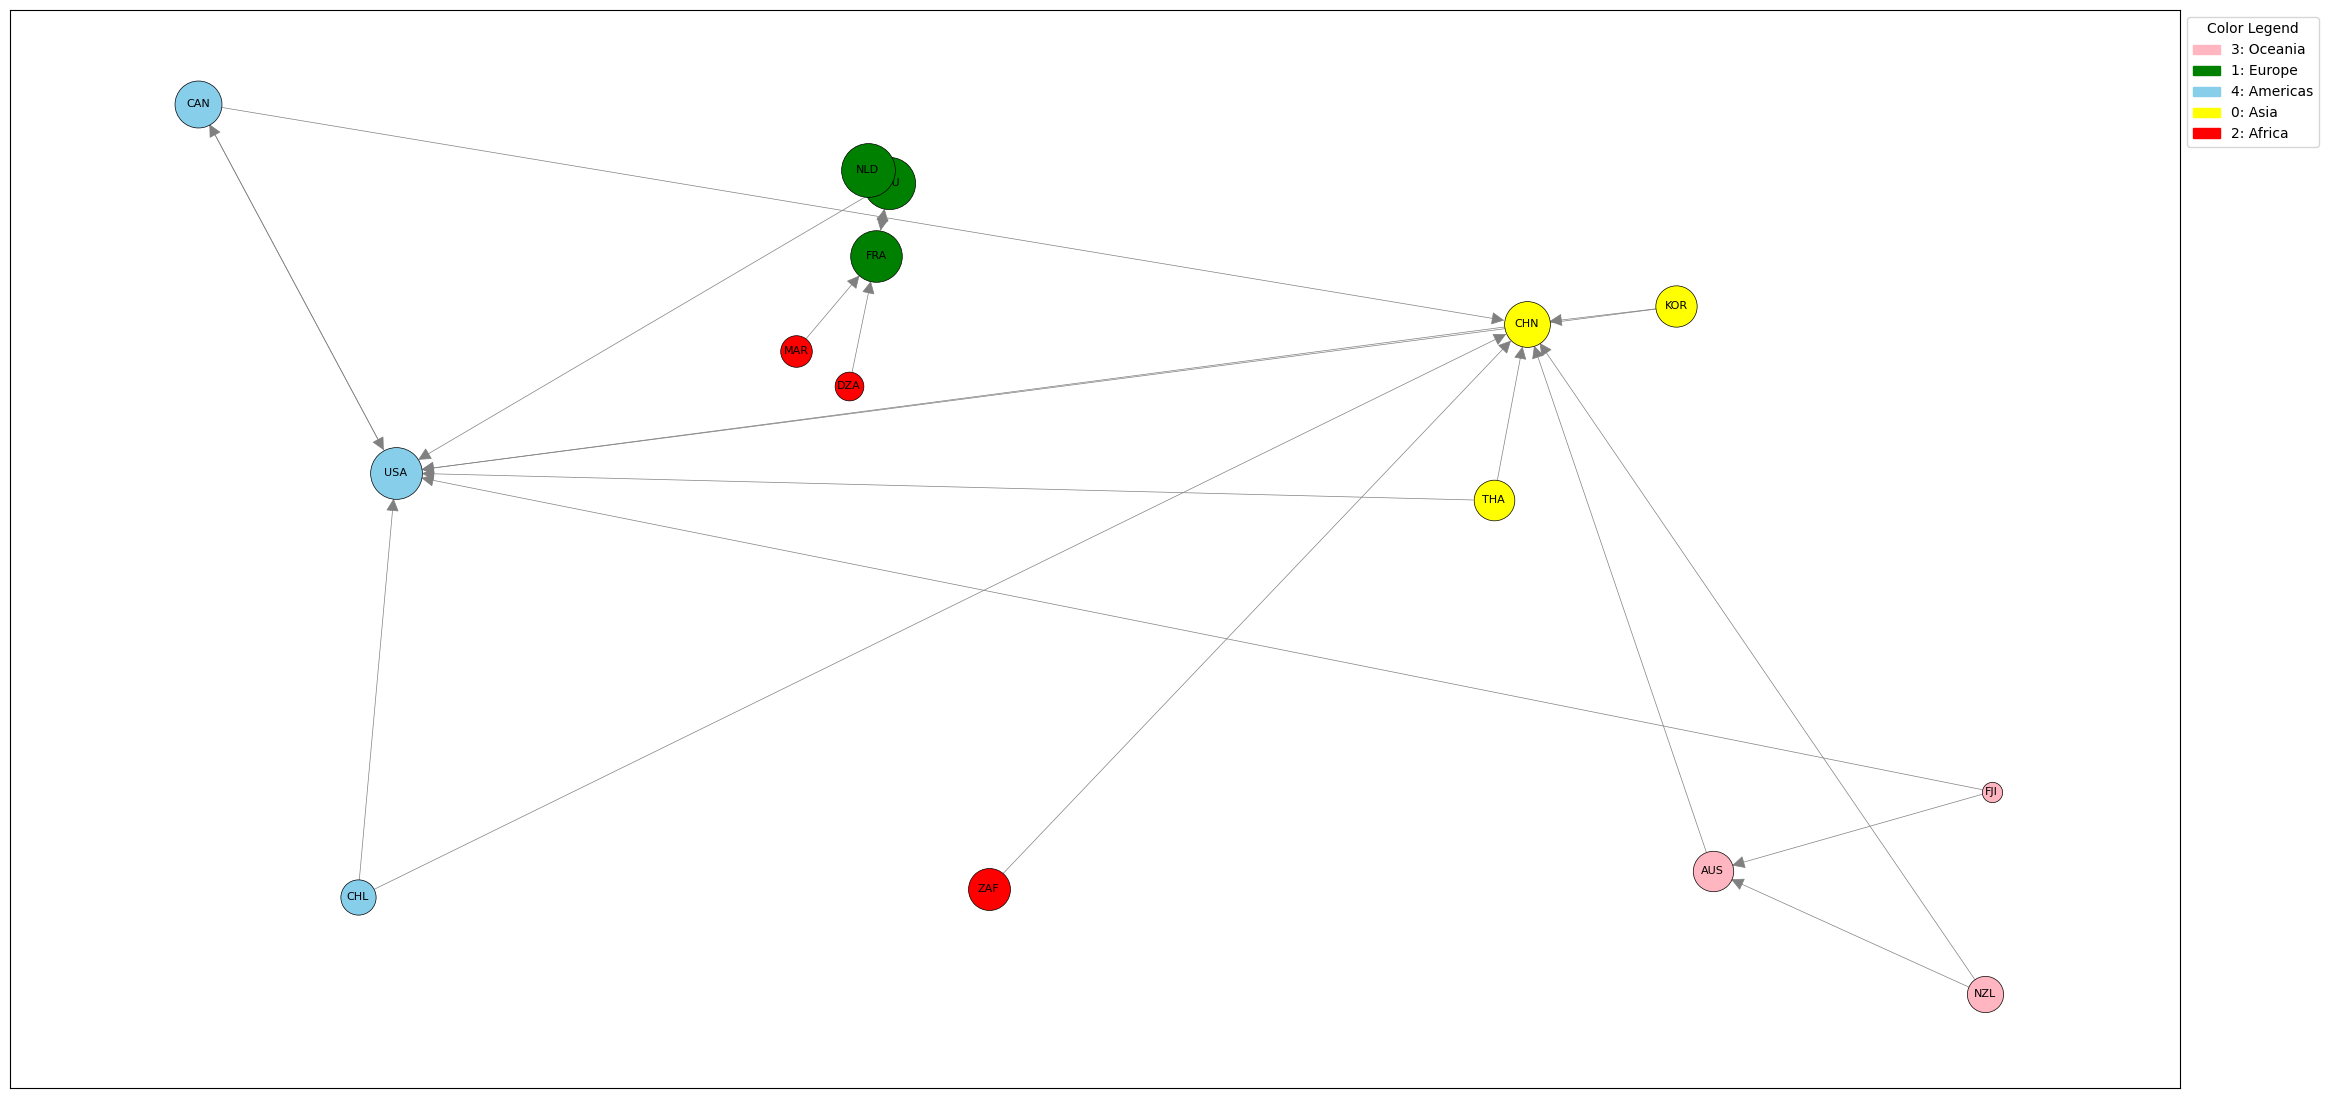

In [128]:
#stampa mappa. Mappa dei primi tre paesi con inbound_count più alto, divisi per region code

# Ordina il dataframe in base alla colonna "inbound_count" in ordine decrescente
df_sorted = dfPaeseCoord.sort_values(by='inbound_count', ascending=False)

# Crea un dataframe vuoto per immagazzinare i risultati
top3_countries_by_region = pd.DataFrame()

# Itera attraverso i valori unici nella colonna 'region-code'
for region_code in df_sorted['region-code'].unique():
    # Seleziona solo le righe con il region_code corrente
    region_df = df_sorted[df_sorted['region-code'] == region_code]
    
    # Se ci sono almeno 3 paesi nella regione, aggiungili al dataframe dei risultati
    if len(region_df) >= 3:
        top3_countries_by_region = pd.concat([top3_countries_by_region, region_df.head(3)])

# Resetta gli indici del nuovo dataframe
top3_countries_by_region.reset_index(drop=True, inplace=True)


G = nx.DiGraph()

# Filtra i dati per assicurarti che le colonne di posizione contengano solo valori numerici validi
#dfPaeseCoord = dfPaeseCoord[dfPaeseCoord['Longitude'].notna() & dfPaeseCoord['Latitude'].notna()]


# Aggiungi nodi al grafo

for index, row in top3_countries_by_region.iterrows():
    G.add_node(row['iso_3digit_alpha'], 
               pos=(row['Longitude'], row['Latitude']), 
               country_code=row['country_code'],
               size=row['inbound_count'],
               color=row['colore'],
               index = index)

print(G.number_of_nodes())

for i, r in df_top2_partners.iterrows():
    node_i_country_code = r['i']
    node_j_country_code = r['j']
    
    # Cerca i nodi corrispondenti ai country cod
    node_i = next((node for node, data in G.nodes(data=True) if data['country_code'] == node_i_country_code), None)
    node_j = next((node for node, data in G.nodes(data=True) if data['country_code'] == node_j_country_code), None)

    # Verifica che i nodi siano presenti nel grafo prima di aggiungere l'arco
    if node_i is not None and node_j is not None:
        # Aggiungi l'arco al grafo utilizzando i nodi trovati
        G.add_edge(node_i, node_j)
        
print(G.number_of_edges())

fig, ax = plt.subplots(figsize=(28, 14))

pos = nx.get_node_attributes(G, 'pos')

# Aumenta il fattore di normalizzazione per rendere le dimensioni più grandi
normalization_factor = 1500
# Trova la dimensione massima tra tutti i nodi
max_size = max(G.nodes[node]['size'] for node in G.nodes)
# Normalizza le dimensioni dei nodi in base alle dimensioni dell'area di plotting
node_sizes_normalized = [G.nodes[node]['size'] / max_size * normalization_factor for node in G.nodes]

# Creare una legenda personalizzata
unique_colors = list(set(data['color'] for node, data in G.nodes(data=True)))
color_map = {
    'yellow': {'index': 0, 'label': 'Asia'},
    'green': {'index': 1, 'label': 'Europe'},
    'red': {'index': 2, 'label': 'Africa'},
    'lightpink': {'index': 3, 'label': 'Oceania'},
    'skyblue': {'index': 4, 'label': 'Americas'},
    # Aggiungi altri colori se necessario
}

# Creare una legenda personalizzata
legend_elements = [patches.Patch(color=color, label=f"{color_map[color]['index']}: {color_map[color]['label']}") for color in unique_colors]

# Aggiungere la legenda al grafico
ax.legend(handles=legend_elements, title='Color Legend', bbox_to_anchor=(1, 1), loc='upper left')

# Disegna i nodi personalizzati
for node, (x, y) in pos.items():
    size = node_sizes_normalized[G.nodes[node]['index']]
    color = G.nodes[node]['color']
    
    # Disegna il nodo con zorder basato sulla dimensione
    ax.scatter(x, y, s=size, c=color, edgecolors='black', linewidths=0.5, zorder=size)

# Aggiungi l'etichetta del nodo dopo aver disegnato i nodi
for node, (x, y) in pos.items():
    size = node_sizes_normalized[G.nodes[node]['index']]
    
    # Aggiungi l'etichetta del nodo
    ax.annotate(node, (x, y), textcoords="offset points", xytext=(0, 0), ha='center', va='center', fontsize=8, zorder=size + 1)





# Disegna gli archi
edges = nx.draw_networkx_edges(G, pos, ax=ax, width=0.5,node_size=node_sizes_normalized, edge_color='grey', arrows=True, arrowstyle="-|>",arrowsize=20)
plt.savefig("C:/Users/Michele/Desktop/UNIBO/2° ANNO/SNA/progetto/figura2_2.jpg", dpi=300)
plt.show()
